The vast majority of the data we have is unlabeled. There is huge potiental for unsupervised learning, but not enough methods for it. Thus Supervised learning is what we do the most with. 

Labeling is often time-consuming and expensive. 

Dimensionality reduction was an unsupervised learning task and we will build on other methods, such as: 

Clustering

    The goal is to group similar instances together into clusters. Clustering is a great tool for data analysis, customer segmentation, recommender systems, search engines, image segmentation, semi-supervised learning, dimensionality reduction, and more.
    
Anomaly detection

    The objective is to learn what “normal” data looks like, and then use that to detect abnormal instances, such as defective items on a production line or a new trend in a time series.


Density estimation

    This is the task of estimating the probability density function (PDF) of the random process that generated the dataset. Density estimation is commonly used for anomaly detection: instances located in very low-density regions are likely to be anomalies. It is also useful for data analysis and visualization.
    
We will start with clustering, using K-Means and DBSCAN, and then we will discuss Gaussian mixture models and see how they can be used for density estimation, clustering, and anomaly detection.

# Clustering

As you enjoy a hike in the mountains, you stumble upon a plant you have never seen before. You look around and you notice a few more. They are not identical, yet they are sufficiently similar for you to know that they most likely belong to the same species (or at least the same genus). You may need a botanist to tell you what species that is, but you certainly don’t need an expert to identify groups of similar-looking objects. This is called clustering: it is the task of identifying similar instances and assigning them to clusters, or groups of similar instances.

Just like in classification, each instance gets assigned to a group. However, unlike classification, clustering is an unsupervised task. Consider Figure 9-1: on the left is the iris dataset, where each instance’s species (i.e., its class) is represented with a different marker. 

It is a labeled dataset, for which classification algorithms such as Logistic Regression, SVMs, or Random Forest classifiers are well suited. On the right is the same dataset, but without the labels, so you cannot use a classification algorithm anymore. This is where clustering algorithms step in: many of them can easily detect the lower-left cluster. It is also quite easy to see with our own eyes, but it is not so obvious that the upper-right cluster is composed of two distinct sub-clusters. That said, the dataset has two additional features (sepal length and width), not represented here, and clustering algorithms can make good use of all features, so in fact they identify the three clusters fairly well (e.g., using a Gaussian mixture model, only 5 instances out of 150 are assigned to the wrong cluster).

![Figure 9-1](https://learning.oreilly.com/library/view/hands-on-machine-learning/9781492032632/assets/mls2_0901.png)

Clustering is used in a wide variety of applications, including these:

For customer segmentation

    You can cluster your customers based on their purchases and their activity on your website. This is useful to understand who your customers are and what they need, so you can adapt your products and marketing campaigns to each segment. For example, customer segmentation can be useful in recommender systems to suggest content that other users in the same cluster enjoyed.
    
For data analysis

    When you analyze a new dataset, it can be helpful to run a clustering algorithm, and then analyze each cluster separately.
    
As a dimensionality reduction technique

    Once a dataset has been clustered, it is usually possible to measure each instance’s affinity with each cluster (affinity is any measure of how well an instance fits into a cluster). Each instance’s feature vector x can then be replaced with the vector of its cluster affinities. If there are k clusters, then this vector is k-dimensional. This vector is typically much lower-dimensional than the original feature vector, but it can preserve enough information for further processing.
    
For anomaly detection (also called outlier detection)

    Any instance that has a low affinity to all the clusters is likely to be an anomaly. For example, if you have clustered the users of your website based on their behavior, you can detect users with unusual behavior, such as an unusual number of requests per second. Anomaly detection is particularly useful in detecting defects in manufacturing, or for fraud detection.
    
For semi-supervised learning

    If you only have a few labels, you could perform clustering and propagate the labels to all the instances in the same cluster. This technique can greatly increase the number of labels available for a subsequent supervised learning algorithm, and thus improve its performance.
    
For search engines

    Some search engines let you search for images that are similar to a reference image. To build such a system, you would first apply a clustering algorithm to all the images in your database; similar images would end up in the same cluster. Then when a user provides a reference image, all you need to do is use the trained clustering model to find this image’s cluster, and you can then simply return all the images from this cluster.
    
To segment an image

    By clustering pixels according to their color, then replacing each pixel’s color with the mean color of its cluster, it is possible to considerably reduce the number of different colors in the image. Image segmentation is used in many object detection and tracking systems, as it makes it easier to detect the contour of each object.
    
There is no universal definition of what a cluster is: it really depends on the context, and different algorithms will capture different kinds of clusters. Some algorithms look for instances centered around a particular point, called a centroid. Others look for continuous regions of densely packed instances: these clusters can take on any shape. Some algorithms are hierarchical, looking for clusters of clusters. And the list goes on.


In this section, we will look at two popular clustering algorithms, K-Means and DBSCAN, and explore some of their applications, such as nonlinear dimensionality reduction, semi-supervised learning, and anomaly detection.

# K-Means

Consider the unlabeled dataset represented in Figure 9-2 below: you can clearly see five blobs of instances. The K-Means algorithm is a simple algorithm capable of clustering this kind of dataset very quickly and efficiently, often in just a few iterations. It was proposed by Stuart Lloyd at Bell Labs in 1957 as a technique for pulse-code modulation, but it was only published outside of the company in 1982.1 In 1965, Edward W. Forgy had published virtually the same algorithm, so K-Means is sometimes referred to as Lloyd–Forgy.

![Figure 9-2](https://learning.oreilly.com/library/view/hands-on-machine-learning/9781492032632/assets/mls2_0902.png)

Let’s train a K-Means clusterer on this dataset. It will try to find each blob’s center and assign each instance to the closest blob:



In [1]:
from sklearn.datasets import make_blobs
import numpy as np

blob_centers = np.array(
    [[ 0.2,  2.3],
     [-1.5 ,  2.3],
     [-2.8,  1.8],
     [-2.8,  2.8],
     [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])
X, y = make_blobs(n_samples=2000, centers=blob_centers,
                  cluster_std=blob_std, random_state=7)

In [2]:
from sklearn.cluster import KMeans
k = 5
kmeans = KMeans(n_clusters=k)
y_pred = kmeans.fit_predict(X)

Note that you have to specify the number of clusters k that the algorithm must find. In this example, it is pretty obvious from looking at the data that k should be set to 5, but in general it is not that easy. We will discuss this shortly.

Each instance was assigned to one of the five clusters. In the context of clustering, an instance’s label is the index of the cluster that this instance gets assigned to by the algorithm: this is not to be confused with the class labels in classification (remember that clustering is an unsupervised learning task). The KMeans instance preserves the labels of the instances it was trained on, available via the labels_ instance variable:

In [3]:
>>> y_pred is kmeans.labels_
True

True

In [4]:
# We can also take a look at the five centroids that the algorithm found:
>>> kmeans.cluster_centers_

array([[-2.79290307,  2.79641063],
       [ 0.20876306,  2.25551336],
       [-2.80037642,  1.30082566],
       [-1.46679593,  2.28585348],
       [-2.80389616,  1.80117999]])

In [5]:
# You can easily assign new instances to the cluster whose centroid is closest:
>>> X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])
>>> kmeans.predict(X_new)

array([1, 1, 0, 0])

If you plot the cluster’s decision boundaries, you get a Voronoi tessellation (see Figure 9-3 below, where each centroid is represented with an X).

![Figure 9-3](https://learning.oreilly.com/library/view/hands-on-machine-learning/9781492032632/assets/mls2_0903.png)


The vast majority of the instances were clearly assigned to the appropriate cluster, but a few instances were probably mislabeled (especially near the boundary between the top-left cluster and the central cluster). Indeed, the K-Means algorithm does not behave very well when the blobs have very different diameters because all it cares about when assigning an instance to a cluster is the distance to the centroid.

Instead of assigning each instance to a single cluster, which is called _hard clustering_ , it can be useful to give each instance a score per cluster, which is called _soft clustering_. The score can be the distance between the instance and the centroid; conversely, it can be a similarity score (or affinity), such as the Gaussian Radial Basis Function (introduced in Chapter 5). In the KMeans class, the transform() method measures the distance from each instance to every centroid:



In [6]:
>>> kmeans.transform(X_new)

array([[2.9042344 , 0.32995317, 2.88633901, 1.49439034, 2.81093633],
       [5.84739223, 2.80290755, 5.84236351, 4.4759332 , 5.80730058],
       [0.29040966, 3.29399768, 1.71086031, 1.69136631, 1.21475352],
       [0.36159148, 3.21806371, 1.21567622, 1.54808703, 0.72581411]])

In this example, the first instance in X_new is located at a distance of 2.81 from the first centroid, 0.33 from the second centroid, 2.90 from the third centroid, 1.49 from the fourth centroid, and 2.89 from the fifth centroid. If you have a high-dimensional dataset and you transform it this way, you end up with a k-dimensional dataset: this transformation can be a very efficient nonlinear dimensionality reduction technique.

# THE K-MEANS ALGORITHM

So, how does the algorithm work? Well, suppose you were given the centroids. You could easily label all the instances in the dataset by assigning each of them to the cluster whose centroid is closest. Conversely, if you were given all the instance labels, you could easily locate all the centroids by computing the mean of the instances for each cluster. But you are given neither the labels nor the centroids, so how can you proceed? Well, just start by placing the centroids randomly (e.g., by picking k instances at random and using their locations as centroids). Then label the instances, update the centroids, label the instances, update the centroids, and so on until the centroids stop moving. The algorithm is guaranteed to converge in a finite number of steps (usually quite small); it will not oscillate forever.

You can see the algorithm in action in Figure 9-4: the centroids are initialized randomly (top left), then the instances are labeled (top right), then the centroids are updated (center left), the instances are relabeled (center right), and so on. As you can see, in just three iterations, the algorithm has reached a clustering that seems close to optimal.

- **NOTE**: The computational complexity of the algorithm is generally linear with regard to the number of instances m, the number of clusters k, and the number of dimensions n. However, this is only true when the data has a clustering structure. If it does not, then in the worst-case scenario the complexity can increase exponentially with the number of instances. In practice, this rarely happens, and K-Means is generally one of the fastest clustering algorithms.


![Figure 9-4](https://learning.oreilly.com/library/view/hands-on-machine-learning/9781492032632/assets/mls2_0904.png)

Although the algorithm is guaranteed to converge, it may not converge to the right solution (i.e., it may converge to a local optimum): whether it does or not depends on the centroid initialization. Figure 9-5 shows two suboptimal solutions that the algorithm can converge to if you are not lucky with the random initialization step.

![Figure 9-5](https://learning.oreilly.com/library/view/hands-on-machine-learning/9781492032632/assets/mls2_0905.png)

Let’s look at a few ways you can mitigate this risk by improving the centroid initialization.

# CENTROID INITIALIZATION METHODS

If you happen to know approximately where the centroids should be (e.g., if you ran another clustering algorithm earlier), then you can set the init hyperparameter to a NumPy array containing the list of centroids, and set n_init to 1:



In [7]:
good_init = np.array([[-3, 3], [-3, 2], [-3, 1], [-1, 2], [0, 2]])
kmeans = KMeans(n_clusters=5, init=good_init, n_init=1)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True,
       init=array([[-3,  3],
       [-3,  2],
       [-3,  1],
       [-1,  2],
       [ 0,  2]]),
       max_iter=300, n_clusters=5, n_init=1, n_jobs=None,
       precompute_distances='auto', random_state=None, tol=0.0001, verbose=0)

Another solution is to run the algorithm multiple times with different random initializations and keep the best solution. The number of random initializations is controlled by the n_init hyperparameter: by default, it is equal to 10, which means that the whole algorithm described earlier runs 10 times when you call fit(), and Scikit-Learn keeps the best solution. But how exactly does it know which solution is the best? It uses a performance metric! That metric is called the model’s inertia, which is the mean squared distance between each instance and its closest centroid. It is roughly equal to 223.3 for the model on the left in Figure 9-5, 237.5 for the model on the right in Figure 9-5, and 211.6 for the model in Figure 9-3. The KMeans class runs the algorithm n_init times and keeps the model with the lowest inertia. In this example, the model in Figure 9-3 will be selected (unless we are very unlucky with n_init consecutive random initializations). If you are curious, a model’s inertia is accessible via the inertia_ instance variable:

In [8]:
kmeans.inertia_

211.5985372581684

The score() method returns the negative inertia. Why negative? Because a predictor’s score() method must always respect Scikit-Learn’s “greater is better” rule: if a predictor is better than another, its score() method should return a greater score.



In [9]:
>>> kmeans.score(X)

-211.59853725816856

An important improvement to the K-Means algorithm, K-Means++, was proposed in a 2006 paper by David Arthur and Sergei Vassilvitskii. They introduced a smarter initialization step that tends to select centroids that are distant from one another, and this improvement makes the K-Means algorithm much less likely to converge to a suboptimal solution. They showed that the additional computation required for the smarter initialization step is well worth it because it makes it possible to drastically reduce the number of times the algorithm needs to be run to find the optimal solution. Here is the K-Means++ initialization algorithm:

1. Take one centroid $c^{(1)}$, chosen uniformly at random from the dataset.


2. Take a new centroid $c^{(i)}$, choosing an instance $x^{(i)}$ with probability $
D\left(\mathbf{x}^{(i)}\right)^{2} / \sum_{j=1}^{m} D\left(\mathbf{x}^{(j)}\right)^{2}
$, where $D(x^{(i)})$ is the distance between the instance $x^{(i)}$ and the closest centroid that was already chosen. This probability distribution ensures that instances farther away from already chosen centroids are much more likely be selected as centroids.


3. Repeat the previous step until all $k$ centroids have been chosen.

The KMeans class uses this initialization method by default. If you want to force it to use the original method (i.e., picking k instances randomly to define the initial centroids), then you can set the init hyperparameter to "random". You will rarely need to do this.

# ACCELERATED K-MEANS AND MINI-BATCH K-MEANS

Another important improvement to the K-Means algorithm was proposed in a 2003 paper by Charles Elkan. It considerably accelerates the algorithm by avoiding many unnecessary distance calculations. Elkan achieved this by exploiting the triangle inequality (i.e., that a straight line is always the shortest distance between two points5) and by keeping track of lower and upper bounds for distances between instances and centroids. This is the algorithm the KMeans class uses by default (you can force it to use the original algorithm by setting the algorithm hyperparameter to "full", although you probably will never need to).

Yet another important variant of the K-Means algorithm was proposed in a 2010 paper by David Sculley. Instead of using the full dataset at each iteration, the algorithm is capable of using mini-batches, moving the centroids just slightly at each iteration. This speeds up the algorithm typically by a factor of three or four and makes it possible to cluster huge datasets that do not fit in memory. Scikit-Learn implements this algorithm in the MiniBatchKMeans class. You can just use this class like the KMeans class:

In [10]:
from sklearn.cluster import MiniBatchKMeans

minibatch_kmeans = MiniBatchKMeans(n_clusters=5)
minibatch_kmeans.fit(X)

MiniBatchKMeans(batch_size=100, compute_labels=True, init='k-means++',
                init_size=None, max_iter=100, max_no_improvement=10,
                n_clusters=5, n_init=3, random_state=None,
                reassignment_ratio=0.01, tol=0.0, verbose=0)

If the dataset does not fit in memory, the simplest option is to use the NumPy memmap class, as we did for incremental PCA in Chapter 8. Alternatively, you can pass one mini-batch at a time to the partial_fit() method, but this will require much more work, since you will need to perform multiple initializations and select the best one yourself (see the mini-batch K-Means section of the notebook for an example).

- **Warning**: since Scikit-Learn 0.24, fetch_openml() returns a Pandas DataFrame by default. To avoid this and keep the same code as in the book, we use as_frame=False.



In [11]:
# Examples 
import urllib.request
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.target = mnist.target.astype(np.int64)

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    mnist["data"], mnist["target"], random_state=42)


In [13]:
#Writting it to a memmap
filename = "my_mnist.data"
X_mm = np.memmap(filename, dtype='float32', mode='write', shape=X_train.shape)
X_mm[:] = X_train

In [14]:
minibatch_kmeans = MiniBatchKMeans(n_clusters=10, batch_size=10, random_state=42)
minibatch_kmeans.fit(X_mm)

MiniBatchKMeans(batch_size=10, compute_labels=True, init='k-means++',
                init_size=None, max_iter=100, max_no_improvement=10,
                n_clusters=10, n_init=3, random_state=42,
                reassignment_ratio=0.01, tol=0.0, verbose=0)

In [15]:
# If your data is so large that you cannot use memmap, things get more complicated. 
#Let's start by writing a function to load the next batch (in real life, you would load the data from disk)
def load_next_batch(batch_size):
    return X[np.random.choice(len(X), batch_size, replace=False)]

In [16]:
# Now we can train the model by feeding it one batch at a time. 
#We also need to implement multiple initializations and keep the model with the lowest inertia:
np.random.seed(42)
k = 5
n_init = 10
n_iterations = 100
batch_size = 100
init_size = 500  # more data for K-Means++ initialization
evaluate_on_last_n_iters = 10

best_kmeans = None

for init in range(n_init):
    minibatch_kmeans = MiniBatchKMeans(n_clusters=k, init_size=init_size)
    X_init = load_next_batch(init_size)
    minibatch_kmeans.partial_fit(X_init)

    minibatch_kmeans.sum_inertia_ = 0
    for iteration in range(n_iterations):
        X_batch = load_next_batch(batch_size)
        minibatch_kmeans.partial_fit(X_batch)
        if iteration >= n_iterations - evaluate_on_last_n_iters:
            minibatch_kmeans.sum_inertia_ += minibatch_kmeans.inertia_

    if (best_kmeans is None or
        minibatch_kmeans.sum_inertia_ < best_kmeans.sum_inertia_):
        best_kmeans = minibatch_kmeans

In [17]:
best_kmeans.score(X)

-211.70999744411483

In [18]:
# Mini-batch K-Means is much faster than regular K-Means:
%timeit KMeans(n_clusters=5, random_state=42).fit(X)

57.1 ms ± 11.8 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [19]:
%timeit MiniBatchKMeans(n_clusters=5, random_state=42).fit(X)

30.8 ms ± 5.38 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


Although the Mini-batch K-Means algorithm is much faster than the regular K-Means algorithm, its inertia is generally slightly worse, especially as the number of clusters increases. You can see this in Figure 9-6 below: the plot on the left compares the inertias of Mini-batch K-Means and regular K-Means models trained on the previous dataset using various numbers of clusters k. The difference between the two curves remains fairly constant, but this difference becomes more and more significant as k increases, since the inertia becomes smaller and smaller. In the plot on the right, you can see that Mini-batch K-Means is much faster than regular K-Means, and this difference increases with k.

In [20]:
# That's much faster! However, its performance is often lower (higher inertia), 
# and it keeps degrading as k increases. Let's plot the inertia ratio 
# and the training time ratio between Mini-batch K-Means and regular K-Means:
from timeit import timeit

times = np.empty((30, 2))
inertias = np.empty((30, 2))
for k in range(1, 31):
    kmeans_ = KMeans(n_clusters=k, random_state=42)
    minibatch_kmeans = MiniBatchKMeans(n_clusters=k, random_state=42)
    print("\r{}/{}".format(k, 31), end="")
    times[k-1, 0] = timeit("kmeans_.fit(X)", number=10, globals=globals())
    times[k-1, 1]  = timeit("minibatch_kmeans.fit(X)", number=10, globals=globals())
    inertias[k-1, 0] = kmeans_.inertia_
    inertias[k-1, 1] = minibatch_kmeans.inertia_

30/31

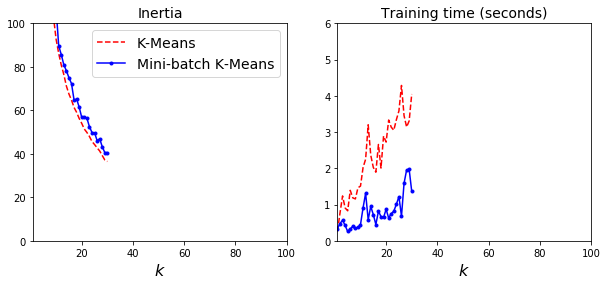

In [21]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))

plt.subplot(121)
plt.plot(range(1, 31), inertias[:, 0], "r--", label="K-Means")
plt.plot(range(1, 31), inertias[:, 1], "b.-", label="Mini-batch K-Means")
plt.xlabel("$k$", fontsize=16)
plt.title("Inertia", fontsize=14)
plt.legend(fontsize=14)
plt.axis([1, 100, 0, 100])

plt.subplot(122)
plt.plot(range(1, 31), times[:, 0], "r--", label="K-Means")
plt.plot(range(1, 31), times[:, 1], "b.-", label="Mini-batch K-Means")
plt.xlabel("$k$", fontsize=16)
plt.title("Training time (seconds)", fontsize=14)
plt.axis([1, 100, 0, 6])

plt.show()

# FINDING THE OPTIMAL NUMBER OF CLUSTERS

So far, we have set the number of clusters k to 5 because it was obvious by looking at the data that this was the correct number of clusters. But in general, it will not be so easy to know how to set k, and the result might be quite bad if you set it to the wrong value. As you can see in Figure 9-7 below, setting k to 3 or 8 results in fairly bad models.

![Figure 9-7](https://learning.oreilly.com/library/view/hands-on-machine-learning/9781492032632/assets/mls2_0907.png)

You might be thinking that we could just pick the model with the lowest inertia, right? Unfortunately, it is not that simple. The inertia for k=3 is 653.2, which is much higher than for k=5 (which was 211.6). But with k=8, the inertia is just 119.1. The inertia is not a good performance metric when trying to choose k because it keeps getting lower as we increase k. Indeed, the more clusters there are, the closer each instance will be to its closest centroid, and therefore the lower the inertia will be. Let’s plot the inertia as a function of k (see Figure 9-8 below).

![Figure 9-8](https://learning.oreilly.com/library/view/hands-on-machine-learning/9781492032632/assets/mls2_0908.png)

As you can see, the inertia drops very quickly as we increase k up to 4, but then it decreases much more slowly as we keep increasing k. This curve has roughly the shape of an arm, and there is an “elbow” at k = 4. So, if we did not know better, 4 would be a good choice: any lower value would be dramatic, while any higher value would not help much, and we might just be splitting perfectly good clusters in half for no good reason.

This technique for choosing the best value for the number of clusters is rather coarse. A more precise approach (but also more computationally expensive) is to use the silhouette score, which is the mean silhouette coefficient over all the instances. An instance’s silhouette coefficient is equal to (b – a) / max(a, b), where a is the mean distance to the other instances in the same cluster (i.e., the mean intra-cluster distance) and b is the mean nearest-cluster distance (i.e., the mean distance to the instances of the next closest cluster, defined as the one that minimizes b, excluding the instance’s own cluster). The silhouette coefficient can vary between –1 and +1. A coefficient close to +1 means that the instance is well inside its own cluster and far from other clusters, while a coefficient close to 0 means that it is close to a cluster boundary, and finally a coefficient close to –1 means that the instance may have been assigned to the wrong cluster.

To compute the silhouette score, you can use Scikit-Learn’s silhouette_score() function, giving it all the instances in the dataset and the labels they were assigned:



In [22]:
from sklearn.metrics import silhouette_score
silhouette_score(X, kmeans.labels_)

0.655517642572828

Let's compare the silhouette score for each cluster. 

![Figure 9-9](https://learning.oreilly.com/library/view/hands-on-machine-learning/9781492032632/assets/mls2_0909.png)

As you can see, this visualization is much richer than the previous one: although it confirms that k = 4 is a very good choice, it also underlines the fact that k = 5 is quite good as well, and much better than k = 6 or 7. This was not visible when comparing inertias.

An even more informative visualization is obtained when you plot every instance’s silhouette coefficient, sorted by the cluster they are assigned to and by the value of the coefficient. This is called a silhouette diagram (see Figure 9-10). Each diagram contains one knife shape per cluster. The shape’s height indicates the number of instances the cluster contains, and its width represents the sorted silhouette coefficients of the instances in the cluster (wider is better). The dashed line indicates the mean silhouette coefficient.

![Figure 9-10](https://learning.oreilly.com/library/view/hands-on-machine-learning/9781492032632/assets/mls2_0910.png)

The vertical dashed lines represent the silhouette score for each number of clusters. When most of the instances in a cluster have a lower coefficient than this score (i.e., if many of the instances stop short of the dashed line, ending to the left of it), then the cluster is rather bad since this means its instances are much too close to other clusters. We can see that when k = 3 and when k = 6, we get bad clusters. But when k = 4 or k = 5, the clusters look pretty good: most instances extend beyond the dashed line, to the right and closer to 1.0. When k = 4, the cluster at index 1 (the third from the top) is rather big. When k = 5, all clusters have similar sizes. So, even though the overall silhouette score from k = 4 is slightly greater than for k = 5, it seems like a good idea to use k = 5 to get clusters of similar sizes.

# Limits of K-Means

Despite its many merits, most notably being fast and scalable, K-Means is not perfect. As we saw, it is necessary to run the algorithm several times to avoid suboptimal solutions, plus you need to specify the number of clusters, which can be quite a hassle. Moreover, K-Means does not behave very well when the clusters have varying sizes, different densities, or nonspherical shapes. For example, Figure 9-11 below shows how K-Means clusters a dataset containing three ellipsoidal clusters of different dimensions, densities, and orientations.

![Figure 9-11](https://learning.oreilly.com/library/view/hands-on-machine-learning/9781492032632/assets/mls2_0911.png)

As you can see, neither of these solutions is any good. The solution on the left is better, but it still chops off 25% of the middle cluster and assigns it to the cluster on the right. The solution on the right is just terrible, even though its inertia is lower. So, depending on the data, different clustering algorithms may perform better. On these types of elliptical clusters, Gaussian mixture models work great.

- **Note**: It is important to scale the input features before you run K-Means, or the clusters may be very stretched and K-Means will perform poorly. Scaling the features does not guarantee that all the clusters will be nice and spherical, but it generally improves things.

Now let’s look at a few ways we can benefit from clustering. We will use K-Means, but feel free to experiment with other clustering algorithms.

# Using Clustering for Image Segmentation

Image segmentation is the task of partitioning an image into multiple segments. In semantic segmentation, all pixels that are part of the same object type get assigned to the same segment. For example, in a self-driving car’s vision system, all pixels that are part of a pedestrian’s image might be assigned to the “pedestrian” segment (there would be one segment containing all the pedestrians). In instance segmentation, all pixels that are part of the same individual object are assigned to the same segment. In this case there would be a different segment for each pedestrian. The state of the art in semantic or instance segmentation today is achieved using complex architectures based on convolutional neural networks (see Chapter 14). Here, we are going to do something much simpler: color segmentation. We will simply assign pixels to the same segment if they have a similar color. In some applications, this may be sufficient. For example, if you want to analyze satellite images to measure how much total forest area there is in a region, color segmentation may be just fine.

First, use Matplotlib’s imread() function to load the image (see the upper-left image in Figure 9-12):

In [43]:
# Download the ladybug image
import os 
PROJECT_ROOT_DIR = %pwd
images_path = os.path.join(PROJECT_ROOT_DIR, "images", "unsupervised_learning")
os.makedirs(images_path, exist_ok=True)
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
filename = "ladybug.png"
print("Downloading", filename)
url = DOWNLOAD_ROOT + "images/unsupervised_learning/" + filename
urllib.request.urlretrieve(url, os.path.join(images_path, filename))

('C:\\Users\\JungleBook\\Documents\\HOML\\Notes\\images\\unsupervised_learning\\ladybug.png',
 <http.client.HTTPMessage at 0x2b2c55720b8>)

In [45]:
from matplotlib.image import imread  # or `from imageio import imread`
image = imread(os.path.join("images","unsupervised_learning","ladybug.png"))
image.shape

(533, 800, 3)

The image is represented as a 3D array. The first dimension’s size is the height; the second is the width; and the third is the number of color channels, in this case red, green, and blue (RGB). In other words, for each pixel there is a 3D vector containing the intensities of red, green, and blue, each between 0.0 and 1.0 (or between 0 and 255, if you use imageio.imread()). Some images may have fewer channels, such as grayscale images (one channel). And some images may have more channels, such as images with an additional alpha channel for transparency or satellite images, which often contain channels for many light frequencies (e.g., infrared). The following code reshapes the array to get a long list of RGB colors, then it clusters these colors using K-Means:

In [46]:
X = image.reshape(-1, 3)
kmeans = KMeans(n_clusters=8).fit(X)
segmented_img = kmeans.cluster_centers_[kmeans.labels_]
segmented_img = segmented_img.reshape(image.shape)

For example, it may identify a color cluster for all shades of green. Next, for each color (e.g., dark green), it looks for the mean color of the pixel’s color cluster. For example, all shades of green may be replaced with the same light green color (assuming the mean color of the green cluster is light green). Finally, it reshapes this long list of colors to get the same shape as the original image. And we’re done!

This outputs the image shown in the upper right of Figure 9-12. You can experiment with various numbers of clusters, as shown in the figure. When you use fewer than eight clusters, notice that the ladybug’s flashy red color fails to get a cluster of its own: it gets merged with colors from the environment. This is because K-Means prefers clusters of similar sizes. The ladybug is small—much smaller than the rest of the image—so even though its color is flashy, K-Means fails to dedicate a cluster to it.

In [47]:
segmented_imgs = []
n_colors = (10, 8, 6, 4, 2)
for n_clusters in n_colors:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(X)
    segmented_img = kmeans.cluster_centers_[kmeans.labels_]
    segmented_imgs.append(segmented_img.reshape(image.shape))

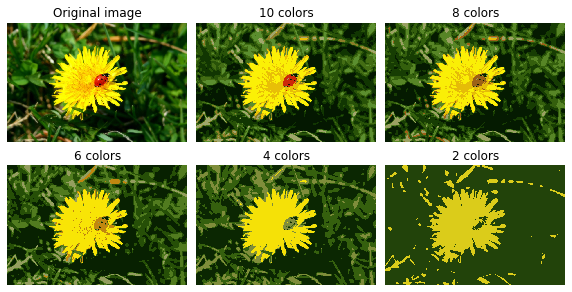

In [49]:
plt.figure(figsize=(10,5))
plt.subplots_adjust(wspace=0.05, hspace=0.1)

plt.subplot(231)
plt.imshow(image)
plt.title("Original image")
plt.axis('off')

for idx, n_clusters in enumerate(n_colors):
    plt.subplot(232 + idx)
    plt.imshow(segmented_imgs[idx])
    plt.title("{} colors".format(n_clusters))
    plt.axis('off')

#save_fig('image_segmentation_diagram', tight_layout=False)
plt.show()

That wasn’t too hard, was it? Now let’s look at another application of clustering: preprocessing.

# Using Clustering for Preprocessing
Clustering can be an efficient preprocessing step before a supervised learning algorithm. As an example of using clustering for preprocessing, let’s tackle the digits dataset, which is a simple MNIST-like dataset containing 1,797 grayscale 8 × 8 images representing the digits 0 to 9. First, load the dataset:

In [50]:
from sklearn.datasets import load_digits

X_digits, y_digits = load_digits(return_X_y=True)

In [51]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits)

In [59]:
# Fit a linear regression model
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=5000,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [1]:
log_reg_score = log_reg.score(X_test, y_test)
log_reg_score

NameError: name 'log_reg' is not defined

In [64]:
#  Let’s see if we can do better by using K-Means as a preprocessing step
# We will create a pipeline that will first cluster the training set into 50 clusters 
# and replace the images with their distances to these 50 clusters
from sklearn.pipeline import Pipeline
pipeline = Pipeline([
    ("kmeans", KMeans(n_clusters=50, random_state=42)),
    ("log_reg", LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)),
])
pipeline.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('kmeans',
                 KMeans(algorithm='auto', copy_x=True, init='k-means++',
                        max_iter=300, n_clusters=50, n_init=10, n_jobs=None,
                        precompute_distances='auto', random_state=42,
                        tol=0.0001, verbose=0)),
                ('log_reg',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=5000,
                                    multi_class='ovr', n_jobs=None,
                                    penalty='l2', random_state=42,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

- **Warning**: Since there are 10 different digits, it is tempting to set the number of clusters to 10. However, each digit can be written several different ways, so it is preferable to use a larger number of clusters, such as 50.

In [65]:
pipeline_score = pipeline.score(X_test, y_test)
pipeline_score

0.9622222222222222

In [66]:
# How much did the error rate drop?
1 - (1 - pipeline_score) / (1 - log_reg_score)

0.2608695652173908

 - Note: Make sure to declare the model's parameters
 
 We reduced the error rate by a large amount. When it does so it take the number of dimensions from 64, the original feature set, to 50 or the number of clusters we specified. 
 
The performance boost comes mostly from the fact that the transformed dataset is closer to being linearly separable than the original dataset, and therefore it is much easier to tackle with Logistic Regression.

We chose the number of clusters k arbitrarily; we can surely do better. Since K-Means is just a preprocessing step in a classification pipeline, finding a good value for k is much simpler than earlier. There’s no need to perform silhouette analysis or minimize the inertia; the best value of k is simply the one that results in the best classification performance during cross-validation. We can use GridSearchCV to find the optimal number of clusters:



In [67]:
from sklearn.model_selection import GridSearchCV

param_grid = dict(kmeans__n_clusters=range(2, 100))
grid_clf = GridSearchCV(pipeline, param_grid, cv=3, verbose=2)
grid_clf.fit(X_train, y_train)

Fitting 3 folds for each of 98 candidates, totalling 294 fits
[CV] kmeans__n_clusters=2 ............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ............................. kmeans__n_clusters=2, total=   0.3s
[CV] kmeans__n_clusters=2 ............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV] ............................. kmeans__n_clusters=2, total=   0.4s
[CV] kmeans__n_clusters=2 ............................................
[CV] ............................. kmeans__n_clusters=2, total=   0.3s
[CV] kmeans__n_clusters=3 ............................................
[CV] ............................. kmeans__n_clusters=3, total=   0.4s
[CV] kmeans__n_clusters=3 ............................................
[CV] ............................. kmeans__n_clusters=3, total=   0.5s
[CV] kmeans__n_clusters=3 ............................................
[CV] ............................. kmeans__n_clusters=3, total=   0.3s
[CV] kmeans__n_clusters=4 ............................................
[CV] ............................. kmeans__n_clusters=4, total=   0.4s
[CV] kmeans__n_clusters=4 ............................................
[CV] ............................. kmeans__n_clusters=4, total=   0.3s
[CV] kmeans__n_clusters=4 ............................................
[CV] .

KeyboardInterrupt: 

In [ ]:
#After letting the grid search run to the end we look at he best value for k. 
grid_clf.best_params_
#It was supposed to be k = 99

#That would have given us an accuracy of over 98%

# Using Clustering for Semi-Supervised Learning

Another use case for clustering is in semi-supervised learning, when we have plenty of unlabeled instances and very few labeled instances. Let’s train a Logistic Regression model on a sample of 50 labeled instances from the digits dataset:

In [74]:
n_labeled = 50
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", random_state=42)
log_reg.fit(X_train[:n_labeled], y_train[:n_labeled])
log_reg.score(X_test, y_test)

C:\Users\JungleBook\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8088888888888889

In [75]:
log_reg.score(X_test, y_test)

0.8088888888888889

It should come as no surprise that this is much lower than earlier, when we trained the model on the full training set.


In [76]:
k = 50
kmeans = KMeans(n_clusters=k)
X_digits_dist = kmeans.fit_transform(X_train)
representative_digit_idx = np.argmin(X_digits_dist, axis=0)
X_representative_digits = X_train[representative_digit_idx]

In [77]:
#Let's manually label 
y_train[representative_digit_idx]

array([4, 7, 5, 6, 7, 0, 8, 4, 2, 6, 2, 9, 5, 8, 7, 0, 6, 3, 2, 5, 8, 1,
       8, 7, 3, 4, 1, 9, 1, 1, 2, 5, 3, 7, 1, 4, 9, 5, 9, 0, 6, 9, 5, 8,
       4, 1, 5, 1, 4, 6])

In [80]:
y_representative_digits = np.array([4, 7, 5, 6, 7, 0, 8, 4, 2, 6, 2, 9, 5, 8, 7, 0, 6, 3, 2, 5, 8, 1,
       8, 7, 3, 4, 1, 9, 1, 1, 2, 5, 3, 7, 1, 4, 9, 5, 9, 0, 6, 9, 5, 8,
       4, 1, 5, 1, 4, 6])

In [81]:
# Now we have a dataset with just 50 labeled instances,
#  Let’s see if the performance is any better:
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_representative_digits, y_representative_digits)
log_reg.score(X_test, y_test)

0.9022222222222223

Since it is often costly and painful to label instances, especially when it has to be done manually by experts, it is a good idea to label representative instances rather than just random instances.

But perhaps we can go one step further: what if we propagated the labels to all the other instances in the same cluster? This is called label propagation:



In [82]:
y_train_propagated = np.empty(len(X_train), dtype=np.int32)
for i in range(k):
    y_train_propagated[kmeans.labels_==i] = y_representative_digits[i]

In [83]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train_propagated)
log_reg.score(X_test, y_test)

C:\Users\JungleBook\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.9222222222222223

Even more performance! The problem is that we propagated each representative instance’s label to all the instances in the same cluster, including the instances located close to the cluster boundaries, which are more likely to be mislabeled.

In [85]:
percentile_closest = 20
X_cluster_dist = X_digits_dist[np.arange(len(X_train)), kmeans.labels_]
for i in range(k):
    in_cluster = (kmeans.labels_ == i)
    cluster_dist = X_cluster_dist[in_cluster]
    cutoff_distance = np.percentile(cluster_dist, percentile_closest)
    above_cutoff = (X_cluster_dist > cutoff_distance)
    X_cluster_dist[in_cluster & above_cutoff] = -1

partially_propagated = (X_cluster_dist != -1)
X_train_partially_propagated = X_train[partially_propagated]
y_train_partially_propagated = y_train_propagated[partially_propagated]

In [86]:
log_reg = LogisticRegression()
log_reg.fit(X_train_partially_propagated, y_train_partially_propagated)
log_reg.score(X_test, y_test)

C:\Users\JungleBook\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.9333333333333333

Pretty good in comparision to Logisitic regression on the entire dataset. This is due to proprogated labels correctly labeled. 


In [87]:
np.mean(y_train_partially_propagated == y_train[partially_propagated])


0.9897610921501706

___
### ACTIVE LEARNING
To continue improving your model and your training set, the next step could be to do a few rounds of active learning, which is when a human expert interacts with the learning algorithm, providing labels for specific instances when the algorithm requests them. There are many different strategies for active learning, but one of the most common ones is called uncertainty sampling. Here is how it works:

The model is trained on the labeled instances gathered so far, and this model is used to make predictions on all the unlabeled instances.

The instances for which the model is most uncertain (i.e., when its estimated probability is lowest) are given to the expert to be labeled.

You iterate this process until the performance improvement stops being worth the labeling effort.

Other strategies include labeling the instances that would result in the largest model change, or the largest drop in the model’s validation error, or the instances that different models disagree on (e.g., an SVM or a Random Forest).

___

Before we move on to Gaussian mixture models, let’s take a look at DBSCAN, another popular clustering algorithm that illustrates a very different approach based on local density estimation. This approach allows the algorithm to identify clusters of arbitrary shapes.

# DBSCAN

This algorithm defines clusters as continuous regions of high density. Here is how it works:

- For each instance, the algorithm counts how many instances are located within a small distance ε (epsilon) from it. This region is called the instance’s ε-neighborhood.

- If an instance has at least min_samples instances in its ε-neighborhood (including itself), then it is considered a core instance. In other words, core instances are those that are located in dense regions.

- All instances in the neighborhood of a core instance belong to the same cluster. This neighborhood may include other core instances; therefore, a long sequence of neighboring core instances forms a single cluster.

- Any instance that is not a core instance and does not have one in its neighborhood is considered an anomaly.

This algorithm works well if all the clusters are dense enough and if they are well separated by low-density regions. The DBSCAN class in Scikit-Learn is as simple to use as you might expect. Let’s test it on the moons dataset, introduced in Chapter 5:



In [88]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=1000, noise=0.05)
dbscan = DBSCAN(eps=0.05, min_samples=5)
dbscan.fit(X)

DBSCAN(algorithm='auto', eps=0.05, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

In [89]:
# The labels of all the instances are now available in the labels_ instance variable:
dbscan.labels_

array([ 0,  1,  0,  2,  3,  1,  0, -1,  1,  3, -1,  0,  3,  5,  0,  0,  0,
        0,  5,  1,  0,  0,  0,  0,  3,  0,  1,  2,  3,  0,  3,  4,  3,  1,
        0,  3,  5,  3,  1,  5,  4,  0,  0,  0,  1,  0,  0,  1,  0,  0,  3,
        2,  3,  1, -1,  0,  1,  0,  0,  3,  5,  0,  0,  3,  0,  4,  0,  2,
        1,  3,  1,  1,  0,  1,  1,  0,  0,  0,  2,  0,  0, -1,  3,  0,  0,
       -1,  1,  0,  0,  0,  0,  1,  2,  3,  3,  3, -1,  0,  1,  1,  0,  1,
        3,  0,  0,  0,  0,  3,  4,  2,  0,  0,  0,  2,  0,  1,  0,  0,  5,
        0,  1,  2,  2,  2,  0, -1,  1,  0,  0,  1,  1,  3,  1,  1,  0,  0,
        6,  3,  2,  3,  0,  1,  0,  2, -1,  0,  6,  5,  0,  0,  4,  0,  2,
        1,  1,  1,  0, -1,  0,  0,  1,  3,  2,  5,  2,  3,  7,  3,  3,  1,
        2,  5,  0,  0,  0,  0,  0,  1,  0,  0,  4,  2,  0,  1,  0,  4,  1,
        0,  0,  1,  0,  3,  0, -1,  3,  0,  3,  0,  0,  0,  1,  2,  1,  6,
        4,  2,  0,  0,  1,  0,  0,  1,  0,  0,  3,  5,  0,  0,  0,  1,  0,
        0,  0,  0,  7,  0

Notice that some instances have a cluster index equal to –1, which means that they are considered as anomalies by the algorithm. The indices of the core instances are available in the core_sample_indices_ instance variable, and the core instances themselves are available in the components_ instance variable: 

In [90]:
len(dbscan.core_sample_indices_)

827

In [91]:
dbscan.core_sample_indices_

array([  0,   1,   2,   3,   5,   6,   8,   9,  11,  12,  14,  15,  16,
        17,  19,  20,  21,  22,  23,  24,  25,  26,  27,  28,  29,  30,
        31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,  42,  43,
        44,  45,  46,  47,  49,  50,  51,  52,  53,  55,  57,  58,  60,
        62,  63,  64,  65,  67,  68,  69,  70,  71,  73,  74,  75,  77,
        78,  79,  80,  82,  83,  84,  86,  89,  90,  91,  94,  95,  97,
        98,  99, 100, 101, 102, 103, 105, 106, 108, 109, 110, 111, 112,
       113, 115, 116, 117, 118, 119, 120, 121, 123, 124, 127, 128, 130,
       131, 133, 134, 135, 136, 137, 138, 139, 141, 142, 143, 145, 147,
       148, 149, 150, 151, 152, 153, 154, 155, 156, 158, 159, 160, 161,
       162, 163, 164, 165, 166, 168, 169, 170, 171, 172, 173, 174, 175,
       176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 188, 189,
       190, 191, 192, 194, 195, 196, 197, 198, 199, 200, 201, 202, 204,
       205, 206, 207, 208, 209, 211, 212, 213, 214, 215, 216, 21

In [92]:
dbscan.components_

array([[ 0.20173215, -0.10065539],
       [-0.68709826,  0.76742887],
       [ 0.43469859, -0.24613521],
       ...,
       [-0.8600187 ,  0.44715633],
       [ 0.97328218, -0.41608305],
       [ 0.17331436,  0.97271981]])

This clustering is represented in the lefthand plot of Figure 9-14 below. As you can see, it identified quite a lot of anomalies, plus seven different clusters. How disappointing! Fortunately, if we widen each instance’s neighborhood by increasing eps to 0.2, we get the clustering on the right, which looks perfect. Let’s continue with this model.

![Figure 9-14](https://learning.oreilly.com/library/view/hands-on-machine-learning/9781492032632/assets/mls2_0914.png)

Somewhat surprisingly, the DBSCAN class does not have a predict() method, although it has a fit_predict() method. In other words, it cannot predict which cluster a new instance belongs to. This implementation decision was made because different classification algorithms can be better for different tasks, so the authors decided to let the user choose which one to use. Moreover, it’s not hard to implement. For example, let’s train a KNeighborsClassifier:

In [93]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(dbscan.components_, dbscan.labels_[dbscan.core_sample_indices_])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=50, p=2,
                     weights='uniform')

In [94]:
# Now, given a few new instances, we can predict which cluster they most likely belong to
# and even estimate a probability for each cluster:
X_new = np.array([[-0.5, 0], [0, 0.5], [1, -0.1], [2, 1]])
knn.predict(X_new)

array([1, 0, 5, 0], dtype=int64)

In [95]:
knn.predict_proba(X_new)

array([[0.18, 0.78, 0.  , 0.  , 0.04, 0.  , 0.  , 0.  ],
       [0.54, 0.  , 0.  , 0.  , 0.42, 0.  , 0.04, 0.  ],
       [0.4 , 0.  , 0.  , 0.  , 0.  , 0.6 , 0.  , 0.  ],
       [1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]])

Note that we only trained the classifier on the core instances, but we could also have chosen to train it on all the instances, or all but the anomalies: this choice depends on the final task.

The decision boundary is represented in Figure 9-15 (the crosses represent the four instances in X_new). Notice that since there is no anomaly in the training set, the classifier always chooses a cluster, even when that cluster is far away. It is fairly straightforward to introduce a maximum distance, in which case the two instances that are far away from both clusters are classified as anomalies. To do this, use the kneighbors() method of the KNeighborsClassifier. Given a set of instances, it returns the distances and the indices of the k nearest neighbors in the training set (two matrices, each with k columns):

In [96]:
y_dist, y_pred_idx = knn.kneighbors(X_new, n_neighbors=1)
y_pred = dbscan.labels_[dbscan.core_sample_indices_][y_pred_idx]
y_pred[y_dist > 0.2] = -1
y_pred.ravel()

array([-1,  6,  5, -1], dtype=int64)

![](https://learning.oreilly.com/library/view/hands-on-machine-learning/9781492032632/assets/mls2_0915.png)

In short, DBSCAN is a very simple yet powerful algorithm capable of identifying any number of clusters of any shape. It is robust to outliers, and it has just two hyperparameters (eps and min_samples). If the density varies significantly across the clusters, however, it can be impossible for it to capture all the clusters properly. Its computational complexity is roughly O(m log m), making it pretty close to linear with regard to the number of instances, but Scikit-Learn’s implementation can require up to $O(m^2)$ memory if eps is large.

- **Note**: You may also want to try Hierarchical DBSCAN (HDBSCAN), which is implemented in the scikit-learn-contrib project.


# Other Clustering Algorithms

Scikit-Learn implements several more clustering algorithms that you should take a look at. We cannot cover them all in detail here, but here is a brief overview:

Agglomerative clustering

    A hierarchy of clusters is built from the bottom up. Think of many tiny bubbles floating on water and gradually attaching to each other until there’s one big group of bubbles. Similarly, at each iteration, agglomerative clustering connects the nearest pair of clusters (starting with individual instances). If you drew a tree with a branch for every pair of clusters that merged, you would get a binary tree of clusters, where the leaves are the individual instances. This approach scales very well to large numbers of instances or clusters. It can capture clusters of various shapes, it produces a flexible and informative cluster tree instead of forcing you to choose a particular cluster scale, and it can be used with any pairwise distance. It can scale nicely to large numbers of instances if you provide a connectivity matrix, which is a sparse m × m matrix that indicates which pairs of instances are neighbors (e.g., returned by sklearn.neighbors.kneighbors_graph()). Without a connectivity matrix, the algorithm does not scale well to large datasets.

BIRCH

    The BIRCH (Balanced Iterative Reducing and Clustering using Hierarchies) algorithm was designed specifically for very large datasets, and it can be faster than batch K-Means, with similar results, as long as the number of features is not too large (<20). During training, it builds a tree structure containing just enough information to quickly assign each new instance to a cluster, without having to store all the instances in the tree: this approach allows it to use limited memory, while handling huge datasets.

Mean-Shift

    This algorithm starts by placing a circle centered on each instance; then for each circle it computes the mean of all the instances located within it, and it shifts the circle so that it is centered on the mean. Next, it iterates this mean-shifting step until all the circles stop moving (i.e., until each of them is centered on the mean of the instances it contains). Mean-Shift shifts the circles in the direction of higher density, until each of them has found a local density maximum. Finally, all the instances whose circles have settled in the same place (or close enough) are assigned to the same cluster. Mean-Shift has some of the same features as DBSCAN, like how it can find any number of clusters of any shape, it has very few hyperparameters (just one—the radius of the circles, called the bandwidth), and it relies on local density estimation. But unlike DBSCAN, Mean-Shift tends to chop clusters into pieces when they have internal density variations. Unfortunately, its computational complexity is $O(m^2)$, so it is not suited for large datasets.

Affinity propagation
    
    This algorithm uses a voting system, where instances vote for similar instances to be their representatives, and once the algorithm converges, each representative and its voters form a cluster. Affinity propagation can detect any number of clusters of different sizes. Unfortunately, this algorithm has a computational complexity of $O(m^2)$, so it too is not suited for large datasets.

Spectral clustering

    This algorithm takes a similarity matrix between the instances and creates a low-dimensional embedding from it (i.e., it reduces its dimensionality), then it uses another clustering algorithm in this low-dimensional space (Scikit-Learn’s implementation uses K-Means.) Spectral clustering can capture complex cluster structures, and it can also be used to cut graphs (e.g., to identify clusters of friends on a social network). It does not scale well to large numbers of instances, and it does not behave well when the clusters have very different sizes.

Now let’s dive into Gaussian mixture models, which can be used for density estimation, clustering, and anomaly detection.

# Gaussian Mixtures

A Gaussian mixture model (GMM) is a probabilistic model that assumes that the instances were generated from a mixture of several Gaussian distributions whose parameters are unknown. All the instances generated from a single Gaussian distribution form a cluster that typically looks like an ellipsoid. Each cluster can have a different ellipsoidal shape, size, density, and orientation, just like in Figure 9-11. When you observe an instance, you know it was generated from one of the Gaussian distributions, but you are not told which one, and you do not know what the parameters of these distributions are.

There are several GMM variants. In the simplest variant, implemented in the GaussianMixture class, you must know in advance the number k of Gaussian distributions. The dataset X is assumed to have been generated through the following probabilistic process:

- For each instance, a cluster is picked randomly from among k clusters. The probability of choosing the jth cluster is defined by the cluster’s weight, $ϕ^{(j)}$. The index of the cluster chosen for the ith instance is noted $z^{(i)}$.

- If $z^{(i)}=j$ , meaning the ith instance has been assigned to the jth cluster, the location $x^{(i)}$ of this instance is sampled randomly from the Gaussian distribution with mean $μ^{(j)}$ and covariance matrix $\sum^{(j)}$. This is noted $ x^{(i)}∼N(μ^{(j)},Σ^{(j)}) $.


This generative process can be represented as a graphical model. Figure 9-16 below represents the structure of the conditional dependencies between random variables.

![Figure 9-16](https://learning.oreilly.com/library/view/hands-on-machine-learning/9781492032632/assets/mls2_0916.png)

Here is how to interpret the figure:

- The circles represent random variables.

- The squares represent fixed values (i.e., parameters of the model).

- The large rectangles are called plates. They indicate that their content is repeated several times.

- The number at the bottom right of each plate indicates how many times its content is repeated. So, there are m random variables $z^{(i)}$ (from $z^{(1)}$ to $z^{(m)}$) and m random variables $x^{(i)}$. There are also k means $μ^{(j)}$ and k covariance matrices $Σ^{(j)}$. Lastly, there is just one weight vector ϕ (containing all the weights $ϕ^{(1)}$ to $ϕ^{(k)}$).

- Each variable $z^{(i)}$ is drawn from the categorical distribution with weights $ϕ$. Each variable $x^{(i)}$ is drawn from the normal distribution, with the mean and covariance matrix defined by its cluster $z^{(i)}$.

- The solid arrows represent conditional dependencies. For example, the probability distribution for each random variable $z^{(i)}$ depends on the weight vector $ϕ$. Note that when an arrow crosses a plate boundary, it means that it applies to all the repetitions of that plate. For example, the weight vector $ϕ$ conditions the probability distributions of all the random variables $x^{(1)}$ to $x^{(m)}$.

- The squiggly arrow from $z^{(i)}$ to $x^{(i)}$ represents a switch: depending on the value of $z^{(i)}$ , the instance $x^{(i)}$ will be sampled from a different Gaussian distribution. For example, if $z^{(i)}=j$, then $x^{(i)}∼N(μ^{(j)},Σ^{(j)})$.

- Shaded nodes indicate that the value is known. So, in this case, only the random variables $x^{(i)}$ have known values: they are called observed variables. The unknown random variables $z^{(i)}$ are called latent variables.

So, what can you do with such a model? Well, given the dataset $X$, you typically want to start by estimating the weights $ϕ$ and all the distribution parameters $μ^{(1)}$ to $μ^{(k)}$ and $Σ^{(1)}$ to $Σ^{(k)}$. Scikit-Learn’s GaussianMixture class makes this super easy:

In [4]:
#Data used for examples
from sklearn.datasets import make_blobs 
import numpy as np
X1, y1 = make_blobs(n_samples=1000, centers=((4, -4), (0, 0)), random_state=42)
X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))
X2, y2 = make_blobs(n_samples=250, centers=1, random_state=42)
X2 = X2 + [6, -8]
X = np.r_[X1, X2]
y = np.r_[y1, y2]

In [9]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=3, n_init=10, random_state=42)
gm.fit(X)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=3, n_init=10,
                precisions_init=None, random_state=42, reg_covar=1e-06,
                tol=0.001, verbose=0, verbose_interval=10, warm_start=False,
                weights_init=None)

In [10]:
#Parametes the model estimated 
gm.weights_

array([0.39032584, 0.20961444, 0.40005972])

In [11]:
gm.means_

array([[ 0.05145113,  0.07534576],
       [ 3.39947665,  1.05931088],
       [-1.40764129,  1.42712848]])

In [8]:
gm.covariances_

array([[[ 0.68825143,  0.79617956],
        [ 0.79617956,  1.21242183]],

       [[ 1.14740131, -0.03271106],
        [-0.03271106,  0.95498333]],

       [[ 0.63478217,  0.72970097],
        [ 0.72970097,  1.16094925]]])

The means and covariance matrices were very close to those found by the algorithm. But how? This class relies on the **Expectation-Maximization** (EM) algorithm, which has many similarities with the K-Means algorithm: it also initializes the cluster parameters randomly, then it repeats two steps until convergence, first assigning instances to clusters (this is called the **expectation step**) and then updating the clusters (this is called the **maximization step**).


Sounds familiar, right? In the context of clustering, you can think of EM as a generalization of K-Means that not only finds the cluster centers ($μ^{(1)}$ to $μ^{(k)}$), but also their size, shape, and orientation ($Σ^{(1)}$ to $Σ^{(k)}$), as well as their relative weights ($ϕ^{(1)}$ to $ϕ^{(k)}$). Unlike K-Means, though, EM uses soft cluster assignments, not hard assignments. For each instance, during the expectation step, the algorithm estimates the probability that it belongs to each cluster (based on the current cluster parameters). Then, during the maximization step, each cluster is updated using all the instances in the dataset, with each instance weighted by the estimated probability that it belongs to that cluster. These probabilities are called the **responsibilities** of the clusters for the instances. During the maximization step, each cluster’s update will mostly be impacted by the instances it is most responsible for. 

- **WARNING**: Unfortunately, just like K-Means, EM can end up converging to poor solutions, so it needs to be run several times, keeping only the best solution. This is why we set n_init to 10. Be careful: by default n_init is set to 1.



In [14]:
# You can check whether or not the algorithm converged and how many iterations it took:
gm.converged_

True

In [15]:
gm.n_iter_

4

Now that you have an estimate of the location, size, shape, orientation, and relative weight of each cluster, the model can easily assign each instance to the most likely cluster (hard clustering) or estimate the probability that it belongs to a particular cluster (soft clustering). Just use the predict() method for hard clustering, or the predict_proba() method for soft clustering:

In [16]:
gm.predict(X)

array([0, 0, 2, ..., 1, 1, 1], dtype=int64)

In [17]:
# A Gaussian mixture model is a generative model, meaning you can sample new instances from it 
# (note that they are ordered by cluster index):
X_new, y_new = gm.sample(6)
X_new

array([[-0.86951041, -0.32742378],
       [ 0.29854504,  0.28307991],
       [ 1.84860618,  2.07374016],
       [ 3.98304484,  1.49869936],
       [ 3.8163406 ,  0.53038367],
       [-1.04030781,  0.78655831]])

In [18]:
y_new

array([0, 0, 1, 1, 1, 2])

It is also possible to estimate the density of the model at any given location. This is achieved using the score_samples() method: for each instance it is given, this method estimates the log of the probability density function (PDF) at that location. The greater the score, the higher the density:



In [19]:
gm.score_samples(X)

array([-2.60786904, -3.57094519, -3.3302143 , ..., -3.51359636,
       -4.39793229, -3.80725953])

If you compute the exponential of these scores, you get the value of the PDF at the location of the given instances. These are not probabilities, but probability densities: they can take on any positive value, not just a value between 0 and 1. To estimate the probability that an instance will fall within a particular region, you would have to integrate the PDF over that region (if you do so over the entire space of possible instance locations, the result will be 1).

Figure 9-17 shows the cluster means, the decision boundaries (dashed lines), and the density contours of this model.

![](https://learning.oreilly.com/library/view/hands-on-machine-learning/9781492032632/assets/mls2_0917.png)

Nice! The algorithm clearly found an excellent solution. Of course, we made its task easy by generating the data using a set of 2D Gaussian distributions (unfortunately, real-life data is not always so Gaussian and low-dimensional). We also gave the algorithm the correct number of clusters. When there are many dimensions, or many clusters, or few instances, EM can struggle to converge to the optimal solution. You might need to reduce the difficulty of the task by limiting the number of parameters that the algorithm has to learn. One way to do this is to limit the range of shapes and orientations that the clusters can have. This can be achieved by imposing constraints on the covariance matrices. To do this, set the covariance_type hyperparameter to one of the following values:


"spherical"

    All clusters must be spherical, but they can have different diameters (i.e., different variances).

"diag"

    Clusters can take on any ellipsoidal shape of any size, but the ellipsoid’s axes must be parallel to the coordinate axes (i.e., the covariance matrices must be diagonal).

"tied"
    
    All clusters must have the same ellipsoidal shape, size, and orientation (i.e., all clusters share the same covariance matrix).



By default, covariance_type is equal to "full", which means that each cluster can take on any shape, size, and orientation (it has its own unconstrained covariance matrix). Figure 9-18 plots the solutions found by the EM algorithm when covariance_type is set to "tied" or "spherical.”

![](https://learning.oreilly.com/library/view/hands-on-machine-learning/9781492032632/assets/mls2_0918.png)

- **Note** : The computational complexity of training a GaussianMixture model depends on the number of instances m, the number of dimensions n, the number of clusters k, and the constraints on the covariance matrices. If covariance_type is "spherical or "diag", it is O(kmn), assuming the data has a clustering structure. If covariance_type is "tied" or "full", it is $O(kmn^2 + kn^3)$, so it will not scale to large numbers of features.

Gaussian mixture models can also be used for anomaly detection. Let’s see how.

# Anomaly Detection Using Gaussian Mixtures

Anomaly detection (also called outlier detection) is the task of detecting instances that deviate strongly from the norm. These instances are called anomalies, or outliers, while the normal instances are called inliers. Anomaly detection is useful in a wide variety of applications, such as fraud detection, detecting defective products in manufacturing, or removing outliers from a dataset before training another model (which can significantly improve the performance of the resulting model).

Using a Gaussian mixture model for anomaly detection is quite simple: any instance located in a low-density region can be considered an anomaly. You must define what density threshold you want to use. For example, in a manufacturing company that tries to detect defective products, the ratio of defective products is usually well known. Say it is equal to 4%. You then set the density threshold to be the value that results in having 4% of the instances located in areas below that threshold density. If you notice that you get too many false positives (i.e., perfectly good products that are flagged as defective), you can lower the threshold. Conversely, if you have too many false negatives (i.e., defective products that the system does not flag as defective), you can increase the threshold. This is the usual precision/recall trade-off (see Chapter 3). Here is how you would identify the outliers using the fourth percentile lowest density as the threshold (i.e., approximately 4% of the instances will be flagged as anomalies):



In [21]:
densities = gm.score_samples(X)
density_threshold = np.percentile(densities, 4)

anomalies = X[densities < density_threshold]

Densities accounting for ananomlies. 

![Figure 9-19](https://learning.oreilly.com/library/view/hands-on-machine-learning/9781492032632/assets/mls2_0919.png)

A closely related task is novelty detection: it differs from anomaly detection in that the algorithm is assumed to be trained on a “clean” dataset, uncontaminated by outliers, whereas anomaly detection does not make this assumption. Indeed, outlier detection is often used to clean up a dataset.

- **TIP**: Gaussian mixture models try to fit all the data, including the outliers, so if you have too many of them, this will bias the model’s view of “normality,” and some outliers may wrongly be considered as normal. If this happens, you can try to fit the model once, use it to detect and remove the most extreme outliers, then fit the model again on the cleaned-up dataset. Another approach is to use robust covariance estimation methods (see the EllipticEnvelope class).

Just like K-Means, the GaussianMixture algorithm requires you to specify the number of clusters. So, how can you find it?

# Selecting the Number of Clusters

With K-Means, you could use the inertia or the silhouette score to select the appropriate number of clusters. But with Gaussian mixtures, it is not possible to use these metrics because they are not reliable when the clusters are not spherical or have different sizes. Instead, you can try to find the model that minimizes a theoretical information criterion, such as the Bayesian information criterion (BIC) or the Akaike information criterion (AIC), defined in Equation 9-1.

Eqn 9-1: 
$$BIC=log(m)p−2log(\hat{L})$$
$$AIC=2p−2log(\hat{L})$$

In these equations:

- m is the number of instances, as always.

- p is the number of parameters learned by the model.

- $\hat{L}$ is the maximized value of the likelihood function of the model.


Both the BIC and the AIC penalize models that have more parameters to learn (e.g., more clusters) and reward models that fit the data well. They often end up selecting the same model. When they differ, the model selected by the BIC tends to be simpler (fewer parameters) than the one selected by the AIC, but tends to not fit the data quite as well (this is especially true for larger datasets).


---
# LIKELIHOOD FUNCTION

The terms “probability” and “likelihood” are often used interchangeably in the English language, but they have very different meanings in statistics. Given a statistical model with some parameters $θ$, the word “probability” is used to describe how plausible a future outcome $x$ is (knowing the parameter values $θ$), while the word “likelihood” is used to describe how plausible a particular set of parameter values $θ$ are, after the outcome $x$ is known.

Consider a 1D mixture model of two Gaussian distributions centered at –4 and +1. For simplicity, this toy model has a single parameter$θ$ that controls the standard deviations of both distributions. The top-left contour plot in Figure 9-20 shows the entire model $f(x; θ)$ as a function of both $x$ and $θ$. To estimate the probability distribution of a future outcome $x$, you need to set the model parameter $θ$. For example, if you set $θ$ to 1.3 (the horizontal line), you get the probability density function $f(x; θ=1.3)$ shown in the lower-left plot. Say you want to estimate the probability that $x$ will fall between –2 and +2. You must calculate the integral of the PDF on this range (i.e., the surface of the shaded region). But what if you don’t know $θ$, and instead if you have observed a single instance $x=2.5$ (the vertical line in the upper-left plot)? In this case, you get the likelihood function $ℒ(θ|x=2.5)=f(x=2.5; θ)$, represented in the upper-right plot.

![Figure 9-20](https://learning.oreilly.com/library/view/hands-on-machine-learning/9781492032632/assets/mls2_0920.png)

In short, the PDF is a function of $x$ (with $θ$ fixed), while the likelihood function is a function of $θ$ (with $x$ fixed). It is important to understand that the likelihood function is not a probability distribution: if you integrate a probability distribution over all possible values of $x$, you always get 1; but if you integrate the likelihood function over all possible values of $θ$, the result can be any positive value.


Given a dataset $X$, a common task is to try to estimate the most likely values for the model parameters. To do this, you must find the values that maximize the likelihood function, given $X$. In this example, if you have observed a single instance $x=2.5$, the maximum likelihood estimate (MLE) of $θ$ is $\hat{θ}=1.5$. If a prior probability distribution g over $θ$ exists, it is possible to take it into account by maximizing $ℒ(θ|x)g(θ)$ rather than just maximizing $ℒ(θ|x)$. This is called **maximum a-posteriori** (MAP) estimation. Since MAP constrains the parameter values, you can think of it as a regularized version of MLE.


Notice that maximizing the likelihood function is equivalent to maximizing its logarithm (represented in the lower-righthand plot in Figure 9-20). Indeed the logarithm is a strictly increasing function, so if $θ$ maximizes the log likelihood, it also maximizes the likelihood. It turns out that it is generally easier to maximize the log likelihood. For example, if you observed several independent instances $x^{(1)}$ to $x^{(m)}$, you would need to find the value of $θ$ that maximizes the product of the individual likelihood functions. But it is equivalent, and much simpler, to maximize the sum (not the product) of the log likelihood functions, thanks to the magic of the logarithm which converts products into sums: log(ab)=log(a)+log(b).


Once you have estimated $\hat{θ}$, the value of $θ$ that maximizes the likelihood function, then you are ready to compute $\hat{L}=L(\hat{θ},X)$, which is the value used to compute the AIC and BIC; you can think of it as a measure of how well the model fits the data.

----

In [22]:
#To compute the BIC and AIC, call the bic() and aic() methods:
gm.bic(X)

8189.733705221635

In [23]:
gm.aic(X)

8102.508425106597

Figure 9-21 below shows the BIC for different numbers of clusters k. As you can see, both the BIC and the AIC are lowest when k=3, so it is most likely the best choice. Note that we could also search for the best value for the covariance_type hyperparameter. For example, if it is "spherical" rather than "full", then the model has significantly fewer parameters to learn, but it does not fit the data as well.


![Figure 9-21](https://learning.oreilly.com/library/view/hands-on-machine-learning/9781492032632/assets/mls2_0921.png)


# Bayesian Gaussian Mixture Models

Rather than manually searching for the optimal number of clusters, you can use the BayesianGaussianMixture class, which is capable of giving weights equal (or close) to zero to unnecessary clusters. Set the number of clusters n_components to a value that you have good reason to believe is greater than the optimal number of clusters (this assumes some minimal knowledge about the problem at hand), and the algorithm will eliminate the unnecessary clusters automatically. For example, let’s set the number of clusters to 10 and see what happens:



In [25]:
from sklearn.mixture import BayesianGaussianMixture
bgm = BayesianGaussianMixture(n_components=10, n_init=10, random_state=42)
bgm.fit(X)
np.round(bgm.weights_, 2)

C:\Users\JungleBook\Anaconda3\lib\site-packages\sklearn\mixture\_base.py:267: ConvergenceWarning: Initialization 10 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)


array([0.4 , 0.  , 0.  , 0.  , 0.39, 0.2 , 0.  , 0.  , 0.  , 0.  ])

Perfect: the algorithm automatically detected that only three clusters are needed, and the resulting clusters are almost identical to the ones in Figure 9-17.

In this model, the cluster parameters (including the weights, means, and covariance matrices) are not treated as fixed model parameters anymore, but as latent random variables, like the cluster assignments (see Figure 9-22). So z now includes both the cluster parameters and the cluster assignments.


The Beta distribution is commonly used to model random variables whose values lie within a fixed range. In this case, the range is from 0 to 1. The Stick-Breaking Process (SBP) is best explained through an example: suppose Φ=[0.3, 0.6, 0.5,…], then 30% of the instances will be assigned to cluster 0, then 60% of the remaining instances will be assigned to cluster 1, then 50% of the remaining instances will be assigned to cluster 2, and so on. This process is a good model for datasets where new instances are more likely to join large clusters than small clusters (e.g., people are more likely to move to larger cities). If the concentration α is high, then Φ values will likely be close to 0, and the SBP generate many clusters. Conversely, if the concentration is low, then Φ values will likely be close to 1, and there will be few clusters. Finally, the Wishart distribution is used to sample covariance matrices: the parameters d and V control the distribution of cluster shapes.


![](https://learning.oreilly.com/library/view/hands-on-machine-learning/9781492032632/assets/mls2_0922.png)

Prior knowledge about the latent variables z can be encoded in a probability distribution p(z) called the prior. For example, we may have a prior belief that the clusters are likely to be few (low concentration), or conversely, that they are likely to be plentiful (high concentration). This prior belief about the number of clusters can be adjusted using the weight_concentration_prior hyperparameter. Setting it to 0.01 or 10,000 gives very different clusterings (see Figure 9-23). The more data we have, however, the less the priors matter. In fact, to plot diagrams with such large differences, you must use very strong priors and little data.

![](https://learning.oreilly.com/library/view/hands-on-machine-learning/9781492032632/assets/mls2_0923.png)


Bayes’ theorem (Equation 9-2) tells us how to update the probability distribution over the latent variables after we observe some data X. It computes the posterior distribution p(z|X), which is the conditional probability of z given X.

Eqn 9-2:Bayes’ theorem

$$
p(\mathbf{z} \mid \mathbf{X})=\text { posterior }=\frac{\text { likelihood } \times \text { prior }}{\text { evidence }}=\frac{p(\mathbf{X} \mid \mathbf{z}) p(\mathbf{z})}{p(\mathbf{X})}
$$

Unfortunately, in a Gaussian mixture model (and many other problems), the denominator p(x) is intractable, as it requires integrating over all the possible values of z (Equation 9-3), which would require considering all possible combinations of cluster parameters and cluster assignments.

Equation 9-3. The evidence p(X) is often intractable
$$
p(\mathbf{X})=\int p(\mathbf{X} \mid \mathbf{z}) p(\mathbf{z}) d \mathbf{z}
$$

This intractability is one of the central problems in Bayesian statistics, and there are several approaches to solving it. One of them is variational inference, which picks a family of distributions $q(z; λ)$ with its own variational parameters λ (lambda), then optimizes these parameters to make $q(z)$ a good approximation of $p(z|X)$. This is achieved by finding the value of λ that minimizes the KL divergence from $q(z)$ to $p(z|X)$, noted $DKL(q‖p)$. The KL divergence equation is shown in Equation 9-4, and it can be rewritten as the log of the evidence $(log p(X))$ minus the evidence lower bound (ELBO). Since the log of the evidence does not depend on q, it is a constant term, so minimizing the KL divergence just requires maximizing the ELBO.


Equation 9-4. KL divergence from q(z) to p(z|X)
$$
\begin{aligned}
D_{K L}(q \| p) &=\mathbb{E}_{q}\left[\log \frac{q(\mathbf{z})}{p(\mathbf{z} \mid \mathbf{X})}\right] \\
&=\mathbb{E}_{q}[\log q(\mathbf{z})-\log p(\mathbf{z} \mid \mathbf{X})] \\
&=\mathbb{E}_{q}\left[\log q(\mathbf{z})-\log \frac{p(\mathbf{z}, \mathbf{X})}{p(\mathbf{X})}\right] \\
&=\mathbb{E}_{q}[\log q(\mathbf{z})-\log p(\mathbf{z}, \mathbf{X})+\log p(\mathbf{X})] \\
&=\mathbb{E}_{q}[\log q(\mathbf{z})]-\mathbb{E}_{q}[\log p(\mathbf{z}, \mathbf{X})]+\mathbb{E}_{q}[\log p(\mathbf{X})] \\
&=\mathbb{E}_{q}[\log p(\mathbf{X})]-\left(\mathbb{E}_{q}[\log p(\mathbf{z}, \mathbf{X})]-\mathbb{E}_{q}[\log q(\mathbf{z})]\right) \\
&=\log p(\mathbf{X})-\mathrm{ELBO} \\
& \text { where } \operatorname{ELBO}=\mathbb{E}_{q}[\log p(\mathbf{z}, \mathbf{X})]-\mathbb{E}_{q}[\log q(\mathbf{z})]
\end{aligned}
$$


In practice, there are different techniques to maximize the ELBO. In _mean field variational inference_  it is necessary to pick the family of distributions q(z; λ) and the prior p(z) very carefully to ensure that the equation for the ELBO simplifies to a form that can be computed. Unfortunately, there is no general way to do this. Picking the right family of distributions and the right prior depends on the task and requires some mathematical skills. For example, the distributions and lower-bound equations used in Scikit-Learn’s BayesianGaussianMixture class are presented in the documentation. From these equations it is possible to derive update equations for the cluster parameters and assignment variables: these are then used very much like in the Expectation-Maximization algorithm. In fact, the computational complexity of the BayesianGaussianMixture class is similar to that of the GaussianMixture class (but generally significantly slower). A simpler approach to maximizing the ELBO is called _black box stochastic variational inference_ (BBSVI): at each iteration, a few samples are drawn from q, and they are used to estimate the gradients of the ELBO with regard to the variational parameters λ, which are then used in a gradient ascent step. This approach makes it possible to use Bayesian inference with any kind of model (provided it is differentiable), even deep neural networks; using Bayesian inference with deep neural networks is called Bayesian Deep Learning.


Gaussian mixture models work great on clusters with ellipsoidal shapes, but if you try to fit a dataset with different shapes, you may have bad surprises. For example, let’s see what happens if we use a Bayesian Gaussian mixture model to cluster the moons dataset 


![](https://learning.oreilly.com/library/view/hands-on-machine-learning/9781492032632/assets/mls2_0924.png)

Oops! The algorithm desperately searched for ellipsoids, so it found eight different clusters instead of two. The density estimation is not too bad, so this model could perhaps be used for anomaly detection, but it failed to identify the two moons. Let’s now look at a few clustering algorithms capable of dealing with arbitrarily shaped clusters.

# Other Algorithms for Anomaly and Novelty Detection

Scikit-Learn implements other algorithms dedicated to anomaly detection or novelty detection:

PCA (and other dimensionality reduction techniques with an inverse_transform() method)

    If you compare the reconstruction error of a normal instance with the reconstruction error of an anomaly, the latter will usually be much larger. This is a simple and often quite efficient anomaly detection approach (see this chapter’s exercises for an application of this approach).
    
Fast-MCD (minimum covariance determinant)

    Implemented by the EllipticEnvelope class, this algorithm is useful for outlier detection, in particular to clean up a dataset. It assumes that the normal instances (inliers) are generated from a single Gaussian distribution (not a mixture). It also assumes that the dataset is contaminated with outliers that were not generated from this Gaussian distribution. When the algorithm estimates the parameters of the Gaussian distribution (i.e., the shape of the elliptic envelope around the inliers), it is careful to ignore the instances that are most likely outliers. This technique gives a better estimation of the elliptic envelope and thus makes the algorithm better at identifying the outliers.
    
Isolation Forest

    This is an efficient algorithm for outlier detection, especially in high-dimensional datasets. The algorithm builds a Random Forest in which each Decision Tree is grown randomly: at each node, it picks a feature randomly, then it picks a random threshold value (between the min and max values) to split the dataset in two. The dataset gradually gets chopped into pieces this way, until all instances end up isolated from the other instances. Anomalies are usually far from other instances, so on average (across all the Decision Trees) they tend to get isolated in fewer steps than normal instances.
    
Local Outlier Factor (LOF)

    This algorithm is also good for outlier detection. It compares the density of instances around a given instance to the density around its neighbors. An anomaly is often more isolated than its k nearest neighbors.
    
One-class SVM

    This algorithm is better suited for novelty detection. Recall that a kernelized SVM classifier separates two classes by first (implicitly) mapping all the instances to a high-dimensional space, then separating the two classes using a linear SVM classifier within this high-dimensional space (see Chapter 5). Since we just have one class of instances, the one-class SVM algorithm instead tries to separate the instances in high-dimensional space from the origin. In the original space, this will correspond to finding a small region that encompasses all the instances. If a new instance does not fall within this region, it is an anomaly. There are a few hyperparameters to tweak: the usual ones for a kernelized SVM, plus a margin hyperparameter that corresponds to the probability of a new instance being mistakenly considered as novel when it is in fact normal. It works great, especially with high-dimensional datasets, but like all SVMs it does not scale to large datasets.